In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:

from __future__ import absolute_import
from __future__ import print_function
import pylab as pl
import matplotlib.cm as cm
import itertools
import numpy as np
import csv
np.random.seed(1337) # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

from keras import backend as K

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [90]:
#load datasets
DATASETS_PATH = "./MontgomerySet/CXR_png/"
batch_size =32
num_classes = 2
epochs =50
PREFIX = "MCUCXR_"
SUFFICES = [ "_0.png","_1.png"]
def get_image_filename(index):
    num_zeros = 4-len(str(index))
    if(index < 104):
        img_path = PREFIX + "0"*num_zeros + str(index) + SUFFICES[0]
    else:
        img_path = PREFIX + "0"*num_zeros + str(index) + SUFFICES[1]
    return (DATASETS_PATH + img_path)

In [4]:
get_image_filename(1)

'./MontgomerySet/CXR_png/MCUCXR_0001_0.png'

In [5]:
get_image_filename(104)

'./MontgomerySet/CXR_png/MCUCXR_0104_1.png'

In [6]:
CAPTIONS_PATH = "./MontgomerySet/ClinicalReadings/"

caption_list = os.listdir(CAPTIONS_PATH)

captions =[]
for fname in caption_list:
    with open(os.path.join(CAPTIONS_PATH,fname)) as f:
            lines = f.read().splitlines(True)
            caption =lines[-1]
            captions.append(caption[:-1])
    f.close()
captions = np.asarray(captions)
pd.DataFrame(captions).to_csv("./MontgomerySet/Captions.csv")

In [7]:
BASE_PATH = "./MontgomerySet/"

reader = csv.reader(open(BASE_PATH + 'Captions.csv'))
X =[]
Y =[]
fileNames =[]
fileNamesExcluded = []
for i,row in enumerate(reader):
    if len(row) > 0:
        filename = get_image_filename(i+1)
        img_file = cv2.imread(filename)
        if img_file is not None:
            img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
            img_file = scipy.misc.imresize(arr=img_file, size=(240, 320, 3))        
            img_arr = np.asarray(img_file)
            fileNames.append(filename)
            X.append(img_arr)
            Y.append(row[1])
        else:
            fileNamesExcluded.append(filename)
            print("No file found", filename)

for file in sorted(os.listdir(DATASETS_PATH)):
    file =os.path.join(DATASETS_PATH,file);
    if file not in fileNames:
        if file not in fileNamesExcluded:
            fileNames.append(file)

/home/dronny/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


No file found ./MontgomerySet/CXR_png/MCUCXR_0007_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0009_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0010_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0012_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0014_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0018_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0025_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0032_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0033_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0034_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0036_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0037_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0039_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0050_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0065_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0066_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_0067_0.png
No file found ./MontgomerySet/CXR_png/MCUCXR_007

In [103]:
X = np.asarray(X)
y_ =np.asarray(Y)
fileNames

['./MontgomerySet/CXR_png/MCUCXR_0001_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0002_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0003_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0004_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0005_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0006_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0008_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0011_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0013_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0015_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0016_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0017_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0019_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0020_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0021_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0022_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0023_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0024_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0026_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0027_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0028_0.png',
 './MontgomerySet/CXR_png/MCUCXR_0

In [10]:
def categorize_images(folder):
    labels =np.zeros((138,), dtype =int)
    for i,f in enumerate(folder):
        labels[i] = 0
        if i >= 80:
            labels[i] = 1
    return labels

In [61]:
labels = categorize_images(fileNames)

encoder = LabelEncoder()
encoder.fit(labels)
encoded_y = encoder.transform(labels)

y = np_utils.to_categorical(encoded_y)
y.shape

(138, 2)

In [12]:
#caption vectorization
token_index ={}

for sample in y_:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 100
results = np.zeros(shape=(len(y_),max_length, max(token_index.values())+ 1))

for i, sample in enumerate(y_):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] =1

In [13]:
import sys
def get_data(x):
    InputX =[]
    for filename in x:
        img_file = cv2.imread(filename)
        if img_file is not None:
            img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
            img_file = scipy.misc.imresize(arr=img_file, size=(240, 320, 3))  
            img_arr = np.asarray(img_file)
            InputX.append(img_arr)
    return InputX

In [14]:
input_x = np.asarray(get_data(fileNames))

/home/dronny/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


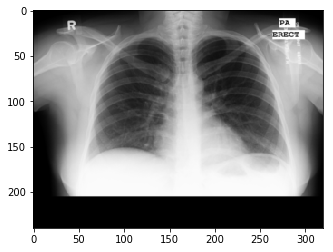

In [100]:
plt.imshow((input_x[0]))

In [101]:
input_x.shape

(138, 240, 320, 3)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(input_x, y, test_size=0.2, random_state=10)

In [40]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [41]:

train_generator = datagen.flow(
        X_train,
        y_train,
    batch_size =batch_size
     )

validation_generator = datagen.flow(
        X_test,
        y_test,
batch_size = batch_size)

In [42]:
normal_test_samples = X_test[np.where(y_test ==0)]
abnormal_test_samples = X_test[np.where(y_test ==1)]


normal_train_samples = X_train[np.where(y_train ==0)]
abnormal_train_samples = X_train[np.where(y_train ==1)]


In [84]:
def sequence_image_generator(x, y, batch_size, generator, seq_len=4):
    new_y = np.repeat(y, seq_len, axis = 0)
    helper_flow = generator.flow(x.reshape((x.shape[0] * seq_len,
                                            x.shape[2])),
                                 new_y,
                                 batch_size=seq_len * batch_size)
    for x_temp, y_temp in helper_flow:
        yield x_temp.reshape((int(x_temp.shape[0] / seq_len), 
                              seq_len, 
                              x.shape[2])), y_temp[::seq_len,:]

In [87]:
datagen = ImageDataGenerator(
     rotation_range=20,
    fill_mode='constant',
    height_shift_range=0.1,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

In [88]:
test_generator = datagen.flow(
        X_test,
       y_test,
        save_to_dir='./MontgomerySet/TEST/',
       batch_size=1)

train_generator = datagen.flow(
        X_train,
       y_train,
        save_to_dir='./MontgomerySet/TRAIN/',
       batch_size=1)

In [82]:
test_generator=sequence_image_generator(X_test, y_test, batch_size, datagen)
train_generator=sequence_image_generator(X_train, y_train, batch_size, datagen)

In [49]:
normal_test_generator=sequence_image_generator(normal_test_samples, y_test[np.where(y_test == 0)], batch_size, datagen)

abnormal_test_generator=sequence_image_generator(abnormal_test_samples, y_test[np.where(y_test == 1)], batch_size, datagen)

normal_train_generator=sequence_image_generator(normal_train_samples, y_train[np.where(y_train == 0)], batch_size, datagen)

abnormal_train_generator=sequence_image_generator(abnormal_train_samples, y_train[np.where(y_train == 1)], batch_size, datagen)

In [89]:
for i in range(2500):
    next(train_generator)
    next(test_generator)

In [ ]:

#normal_test_generator = datagen.flow(
#        normal_test_samples,
 #       y_test[np.where(y_test == 0)],
  #      save_to_dir='./MontgomerySet/TEST/NORMAL_SAMPLES',
   #     batch_size=1)

#abnormal_test_generator = datagen.flow(
 #       abnormal_test_samples,
  #      y_test[np.where(y_test ==1)],
   #     save_to_dir='./MontgomerySet/TEST/ABNORMAL_SAMPLES',
     #   batch_size=1)

#normal_train_generator = datagen.flow(
 #       normal_train_samples,
  #      y_train[np.where(y_train == 0)],
   #     save_to_dir='./MontgomerySet/TRAIN/NORMAL_SAMPLES',
    #    batch_size=1)

#abnormal_train_generator = datagen.flow(
 #       abnormal_train__samples,
  #      y_train[np.where(y_train ==1)],
   #     save_to_dir='./MontgomerySet/TRAIN/ABNORMAL_SAMPLES',
    #    batch_size=1)

In [92]:
def get_model():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(240, 320, 3), output_shape=(240, 320, 3)))
    model.add(Conv2D(32, (3, 3), input_shape=(240, 320, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    return model    

In [ ]:
model = get_model()


# fits the model on batches
history =model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    shuffle=True,
    batch_size=batch_size)

model.save_weights('balanced_model.h5')

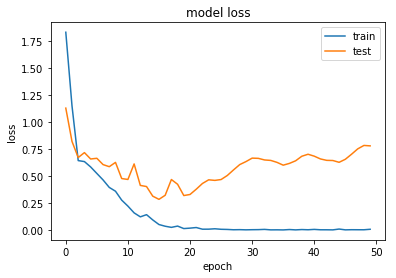

<Figure size 432x288 with 0 Axes>

In [57]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.savefig('model_loss_50epochs.png')

In [93]:
model = get_model()
generator_history=model.fit_generator(
    train_generator,
    steps_per_epoch=len(X_train),
    validation_data=test_generator,
    validation_steps=len(X_test),
    epochs=epochs)
model.save_weights('mask_1.h5') 

Epoch 1/50
110/110 [==============================] - 20s 178ms/step - loss: 0.8138 - acc: 0.5636 - val_loss: 0.6924 - val_acc: 0.5714
Epoch 2/50
110/110 [==============================] - 19s 176ms/step - loss: 0.7011 - acc: 0.5364 - val_loss: 0.6884 - val_acc: 0.5714
Epoch 3/50
110/110 [==============================] - 20s 183ms/step - loss: 0.6905 - acc: 0.5909 - val_loss: 0.6902 - val_acc: 0.5357
Epoch 4/50
110/110 [==============================] - 21s 193ms/step - loss: 0.6825 - acc: 0.6091 - val_loss: 0.6656 - val_acc: 0.6786
Epoch 5/50
110/110 [==============================] - 22s 198ms/step - loss: 0.6930 - acc: 0.5273 - val_loss: 0.6853 - val_acc: 0.5714
Epoch 6/50
110/110 [==============================] - 22s 197ms/step - loss: 0.7022 - acc: 0.5727 - val_loss: 0.7735 - val_acc: 0.6786
Epoch 7/50
110/110 [==============================] - 22s 196ms/step - loss: 0.7180 - acc: 0.6000 - val_loss: 0.6940 - val_acc: 0.5714
Epoch 8/50
110/110 [==============================] - 2

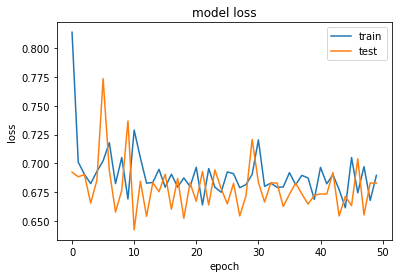

<Figure size 432x288 with 0 Axes>

In [94]:
# summarize history for loss
plt.plot(generator_history.history['loss'])
plt.plot(generator_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.savefig('model_loss_50epochs.png')

In [95]:
from sklearn.metrics import accuracy_score

print('Predicting on test data')
y_pred = np.rint(model.predict(X_test))

print(accuracy_score(y_test, y_pred))

Predicting on test data
0.6071428571428571


In [96]:
from sklearn.metrics import confusion_matrix

y_pred_unencoded = np.argmax(y_pred, axis=1)
y_test_unencoded = np.argmax(y_test, axis=1)

print(confusion_matrix(y_test_unencoded, y_pred_unencoded))

[[17  0]
 [11  0]]
